## Feature Selection Using Regression Coefficients


* The coefficients of the predictors are directly proportional to how much that feature contributes to the final value of y 
* Under the condition of the following assumptions:
  * Linear relationship between predictor (X) and outcome (Y)
  * Xs are independent 
  * Xs are not correlated to each other (no-multicollinearity)
  * Xs are normally distributed 
  * For direct coefficient comparison Xs should be in the same scale 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import StandardScaler 
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

## Load data 

In [3]:
# load data 
data = pd.read_csv('../datasets/dataset_2.csv')
data.shape

(50000, 109)

In [4]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

## Scale data 

In [6]:
# it is important to have data on the same scale so the coefficients represent relative importance 
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

## Select important features

In [10]:
# SelectFromModel does model training and feature selection all together.

# Use l2 regularization (l2) as it is the default parameter in sklearn 
# but we want to evaluate all the coefficients so we assign a really high value to C, 
# which is the inverse of regularization strength. 

sel_ = SelectFromModel(
    LogisticRegression(C=1000, penalty='l2', max_iter=300, random_state=10)
)

sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=1000, max_iter=300,
                                             random_state=10))

In [11]:
sel_.get_support()

array([False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True, False, False, False,  True, False,  True, False,
       False, False, False, False,  True,  True, False,  True, False,
        True, False, False,  True, False, False,  True, False, False,
        True,  True, False, False, False,  True,  True, False,  True,
       False,  True, False, False, False, False,  True, False,  True,
       False,  True, False,  True, False,  True, False, False, False])

In [12]:
# selected features 
selected_feat = X_train.columns[sel_.get_support()]
len(selected_feat)

34

In [13]:
# check the coefficients for all variables 
sel_.estimator_.coef_

array([[ 1.15792066e-02, -1.34259241e-02,  1.08334580e-01,
         2.64747999e-02,  4.34437837e-02, -2.45367235e-02,
        -3.33742734e-02, -6.21493568e-03,  2.32609023e-02,
        -9.82054890e-03,  7.99068444e-02,  5.28655457e-02,
        -3.75142682e-02,  1.92861634e-02, -3.85988250e-02,
         2.37973317e-02,  1.37214965e-02,  5.42323300e-02,
         1.29566685e-02,  1.53889427e-02,  1.42045490e-01,
         2.48291174e-02, -1.28650917e-01,  1.26295584e-01,
         1.43998751e-02,  6.33966039e-02,  2.75900833e-02,
        -8.50767097e-04, -1.41921346e-02, -1.43871851e-02,
         6.85761051e-03, -1.86384084e-01, -1.00705383e-01,
         3.26179848e-02,  1.18559458e-02,  4.35287892e-02,
         1.97238116e-02,  4.49218411e-02,  7.91879780e-02,
         7.01766049e-02, -3.43247321e-03, -2.06389327e-03,
        -5.34997753e-02,  5.64336558e-02,  3.61874237e-03,
         3.05803075e-02,  4.89557092e-03,  4.27883864e-01,
         2.14143809e-02,  7.36347182e-02,  1.49285392e-0

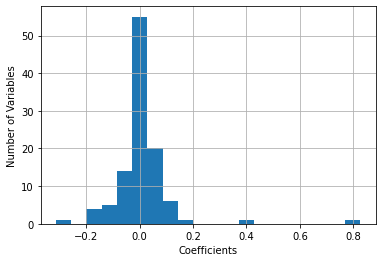

In [14]:
# check the distribution of coefficients 

pd.Series(sel_.estimator_.coef_.ravel()).hist(bins=20)
plt.xlabel('Coefficients')
plt.ylabel('Number of Variables')
plt.show()

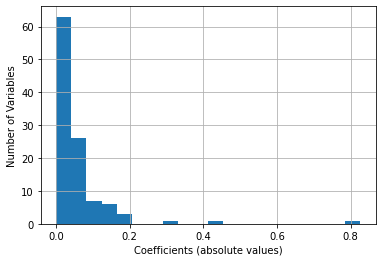

In [20]:
# we are interested in absolute values. 
# check the distribution of absolute coefficients 

pd.Series(np.abs(sel_.estimator_.coef_.ravel())).hist(bins=20)
plt.xlabel('Coefficients (absolute values)')
plt.ylabel('Number of Variables')
plt.show()

In [22]:
# absolute 
abs_mean = np.abs(sel_.estimator_.coef_.ravel()).mean()
abs_mean

0.05689313982843022

In [23]:
# double check the number of coefficients whose absolute value is 
# greater than the absolute mean is the same as the number of selected 
# features found by SelectFromModel. 
np.sum(np.abs(sel_.estimator_.coef_.ravel()) > abs_mean)

34